# Linear Models: Regression

## Linear Regression: Example

N = 100


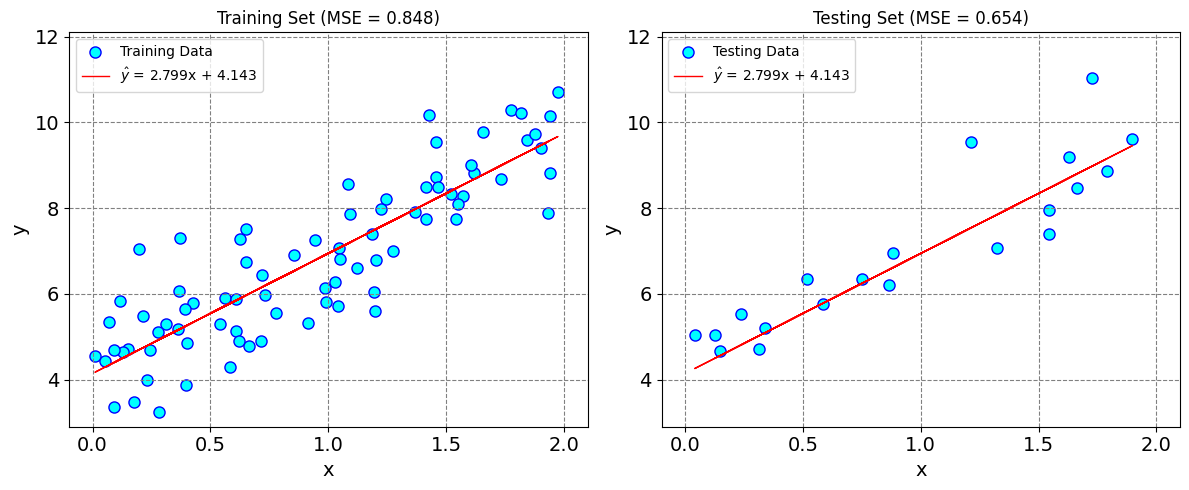

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set custom style
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENSF444/main/Files/mystyle.mplstyle')

# Generate random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print(f'N = {len(y)}')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression linr_reg
linr_reg = LinearRegression()

# Fit the linr_reg to the training data
linr_reg.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = linr_reg.predict(X_train)
y_test_pred = linr_reg.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Create subplots for training and testing sets
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Label for linear regression equation
label = r'$\hat{y}$' + f' = {linr_reg.coef_.ravel()[0]:.3f}x' + f' + {linr_reg.intercept_.ravel()[0]:.3f}'

# Plot for the training set
axs[0].scatter(X_train, y_train, label=f'Training Data', fc='aqua', ec='blue')
axs[0].plot(X_train, y_train_pred, 'r-', label=label)
axs[0].set_title(f'Training Set (MSE = {mse_train:.3f})')

# Plot for the testing set
axs[1].scatter(X_test, y_test, label=f'Testing Data', fc='aqua', ec='blue')
axs[1].plot(X_test, y_test_pred, 'r-', label=label)
axs[1].set_title(f'Testing Set (MSE = {mse_test:.3f})')

for ax in axs:
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend(loc = 'upper left')
  ax.set(xlim = [-.1, 2.1], ylim = [2.9,12.1])

# Adjust layout and display the plots
plt.tight_layout()

## Ridge Regression


alpha = 0.001
Training MSE: 0.848
Test MSE: 0.654


alpha = 0.01
Training MSE: 0.848
Test MSE: 0.654


alpha = 0.03
Training MSE: 0.848
Test MSE: 0.653


alpha = 0.5
Training MSE: 0.849
Test MSE: 0.650


alpha = 1
Training MSE: 0.851
Test MSE: 0.648


alpha = 2
Training MSE: 0.860
Test MSE: 0.649


alpha = 4
Training MSE: 0.892
Test MSE: 0.669


alpha = 6
Training MSE: 0.935
Test MSE: 0.704


alpha = 10
Training MSE: 1.040
Test MSE: 0.803




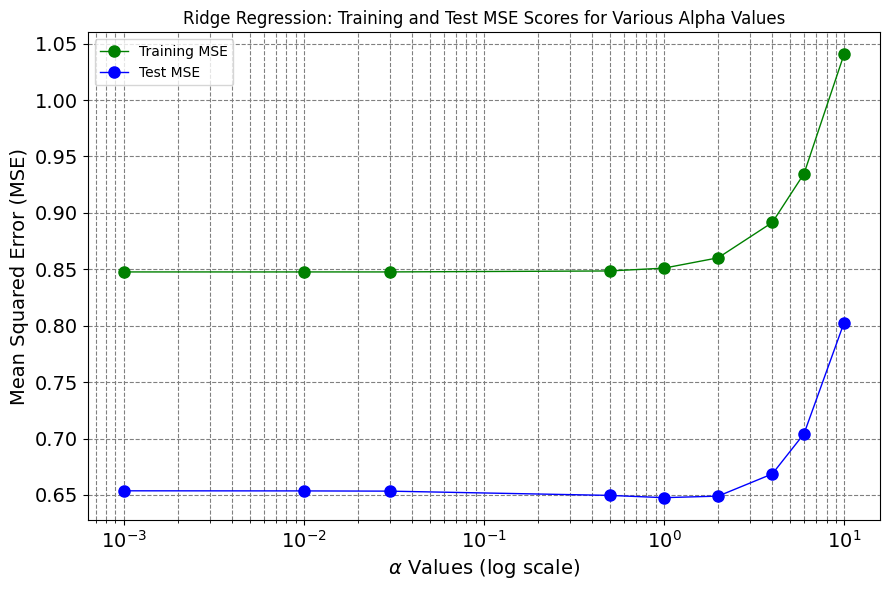

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate random data for demonstration
np.random.seed(42)
X, y = 2 * np.random.rand(100, 1), 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha_values = [1e-3, 1e-2, 3e-2, 0.5, 1, 2, 4, 6, 10]
train_mse_scores, test_mse_scores = [], []

for alpha in alpha_values:
    # Create and fit a Ridge regression model
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)

    # Make predictions on the training and test data
    y_train_pred, y_test_pred = ridge.predict(X_train), ridge.predict(X_test)

    # Calculate Mean Squared Error for training and testing sets
    mse_train, mse_test = mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

    # Append MSE scores to lists for plotting
    train_mse_scores.append(mse_train)
    test_mse_scores.append(mse_test)
    # Print training and test MSE scores
    print(f'alpha = {alpha}')
    print("Training MSE: {:.3f}".format(mse_train))
    print("Test MSE: {:.3f}".format(mse_test))
    print('\n')

# Plotting using fig and ax
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alpha_values, train_mse_scores, label='Training MSE', marker='o', color='Green')
ax.plot(alpha_values, test_mse_scores, label='Test MSE', marker='o', color='Blue')
ax.set_xscale('log')  # Using log scale for better visualization
ax.set_xlabel(r'$\alpha$ Values (log scale)')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Ridge Regression: Training and Test MSE Scores for Various Alpha Values')
ax.legend(loc = 'upper left')

# Adjust layout and display the plots
plt.tight_layout()

## Lasso Regression

alpha = 0.001
Training MSE: 0.848
Test MSE: 0.653


alpha = 0.01
Training MSE: 0.848
Test MSE: 0.651


alpha = 0.03
Training MSE: 0.850
Test MSE: 0.648


alpha = 0.5
Training MSE: 1.585
Test MSE: 1.364


alpha = 1
Training MSE: 3.506
Test MSE: 3.470


alpha = 2
Training MSE: 3.506
Test MSE: 3.470


alpha = 4
Training MSE: 3.506
Test MSE: 3.470


alpha = 6
Training MSE: 3.506
Test MSE: 3.470


alpha = 10
Training MSE: 3.506
Test MSE: 3.470




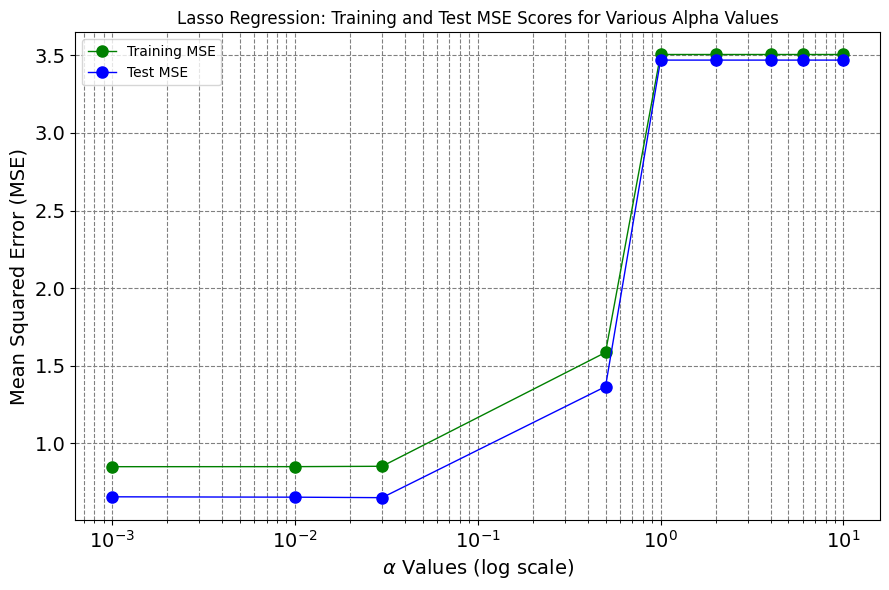

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate random data for demonstration
np.random.seed(42)
X, y = 2 * np.random.rand(100, 1), 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha_values = [1e-3, 1e-2, 3e-2, 0.5, 1, 2, 4, 6, 10]
train_mse_scores, test_mse_scores = [], []

for alpha in alpha_values:
    # Create and fit a Lasso regression model
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)

    # Make predictions on the training and test data
    y_train_pred, y_test_pred = lasso.predict(X_train), lasso.predict(X_test)

    # Calculate Mean Squared Error for training and testing sets
    mse_train, mse_test = mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

    # Append MSE scores to lists for plotting
    train_mse_scores.append(mse_train)
    test_mse_scores.append(mse_test)

    # Print training and test MSE scores
    print(f'alpha = {alpha}')
    print("Training MSE: {:.3f}".format(mse_train))
    print("Test MSE: {:.3f}".format(mse_test))
    print('\n')

# Plotting using fig and ax
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alpha_values, train_mse_scores, label='Training MSE', marker='o', color='Green')
ax.plot(alpha_values, test_mse_scores, label='Test MSE', marker='o', color='Blue')
ax.set_xscale('log')  # Using log scale for better visualization
ax.set_xlabel(r'$\alpha$ Values (log scale)')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Lasso Regression: Training and Test MSE Scores for Various Alpha Values')
ax.legend(loc='upper left')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Regression Accuracy Metrics

In [4]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Linear Regression
linr_reg = LinearRegression().fit(X_train, y_train)
y_train_pred_lr = linr_reg.predict(X_train)
y_test_pred_lr = linr_reg.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1).fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=1e-3).fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Calculate the R-squared for each model on test set
r2_lr_test = r2_score(y_test, y_test_pred_lr)
r2_ridge_test = r2_score(y_test, y_test_pred_ridge)
r2_lasso_test = r2_score(y_test, y_test_pred_lasso)

# Calculate the R-squared for each model on train set
r2_lr_train = r2_score(y_train, y_train_pred_lr)
r2_ridge_train = r2_score(y_train, y_train_pred_ridge)
r2_lasso_train = r2_score(y_train, y_train_pred_lasso)

# Print the combined R-squared values for each model
print(f"R-squared for linear regression:\n  Train Set: {r2_lr_train:.3f}\n  Test Set: {r2_lr_test:.3f}\n")
print(f"R-squared for ridge regression:\n  Train Set: {r2_ridge_train:.3f}\n  Test Set: {r2_ridge_test:.3f}\n")
print(f"R-squared for lasso regression:\n  Train Set: {r2_lasso_train:.3f}\n  Test Set: {r2_lasso_test:.3f}\n")

R-squared for linear regression:
  Train Set: 0.758
  Test Set: 0.807

R-squared for ridge regression:
  Train Set: 0.757
  Test Set: 0.809

R-squared for lasso regression:
  Train Set: 0.758
  Test Set: 0.807



## Another Example

It's important to note that the benefits of Ridge and Lasso are often more pronounced in scenarios with high multicollinearity, where these regularization techniques can help prevent overfitting and improve generalization to new data. Further experimentation with different datasets and tuning of regularization parameters may provide additional insights.

In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset with multicollinearity
X, y = make_regression(n_samples=500, n_features=4, noise=5, random_state=42)
X[:, 2] = 5 * X[:, 1]  # Introducing multicollinearity
X[:, 3] = 7 * X[:, 1]  # Further multicollinearity

# Split the synthetic data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate regression model performance
def evaluate_performance(y_true, y_pred):
    """
    Evaluate the performance of a regression model using mean squared error (MSE) and R-squared.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values

    Returns:
    - mse: Mean Squared Error
    - r2: R-squared
    """
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [6]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso
import numpy as np

# Specify a range of alpha values to test
alphas = np.logspace(-6, 6, 13)  # Set up a logarithmic range of alpha values for regularization

# Create RidgeCV model with specified alphas and perform cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Create LassoCV model with specified alphas and perform cross-validation
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(X_train, y_train)

# Get the best alpha determined by cross-validation
best_alpha_ridge = ridge_cv.alpha_
best_alpha_lasso = lasso_cv.alpha_

# Use the best alpha to train the final Ridge Regression model
ridge_reg_best = Ridge(alpha=best_alpha_ridge)
ridge_reg_best.fit(X_train, y_train)

# Use the best alpha to train the final Lasso Regression model
lasso_reg_best = Lasso(alpha=best_alpha_lasso)
lasso_reg_best.fit(X_train, y_train)

# Print results for Ridge Regression
print(f'Best Alpha (Ridge) = {best_alpha_ridge}')
print("\nRidge Regression with Best Alpha - Training set:")
print("MSE:", f"{evaluate_performance(y_train, ridge_reg_best.predict(X_train))[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_train, ridge_reg_best.predict(X_train))[1]:.3f}")
print("\nRidge Regression with Best Alpha - Test set:")
print("MSE:", f"{evaluate_performance(y_test, ridge_reg_best.predict(X_test))[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_test, ridge_reg_best.predict(X_test))[1]:.3f}")
print(30*'_')

# Print results for Lasso Regression
print(f'Best Alpha (Lasso) = {best_alpha_lasso}')
print("\nLasso Regression with Best Alpha - Training set:")
print("MSE:", f"{evaluate_performance(y_train, lasso_reg_best.predict(X_train))[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_train, lasso_reg_best.predict(X_train))[1]:.3f}")
print("\nLasso Regression with Best Alpha - Test set:")
print("MSE:", f"{evaluate_performance(y_test, lasso_reg_best.predict(X_test))[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_test, lasso_reg_best.predict(X_test))[1]:.3f}")
print(30*'_')

Best Alpha (Ridge) = 1.0

Ridge Regression with Best Alpha - Training set:
MSE: 1544.472
R-squared: 0.390

Ridge Regression with Best Alpha - Test set:
MSE: 1707.123
R-squared: 0.466
______________________________
Best Alpha (Lasso) = 1e-06

Lasso Regression with Best Alpha - Training set:
MSE: 1544.465
R-squared: 0.390

Lasso Regression with Best Alpha - Test set:
MSE: 1706.561
R-squared: 0.466
______________________________


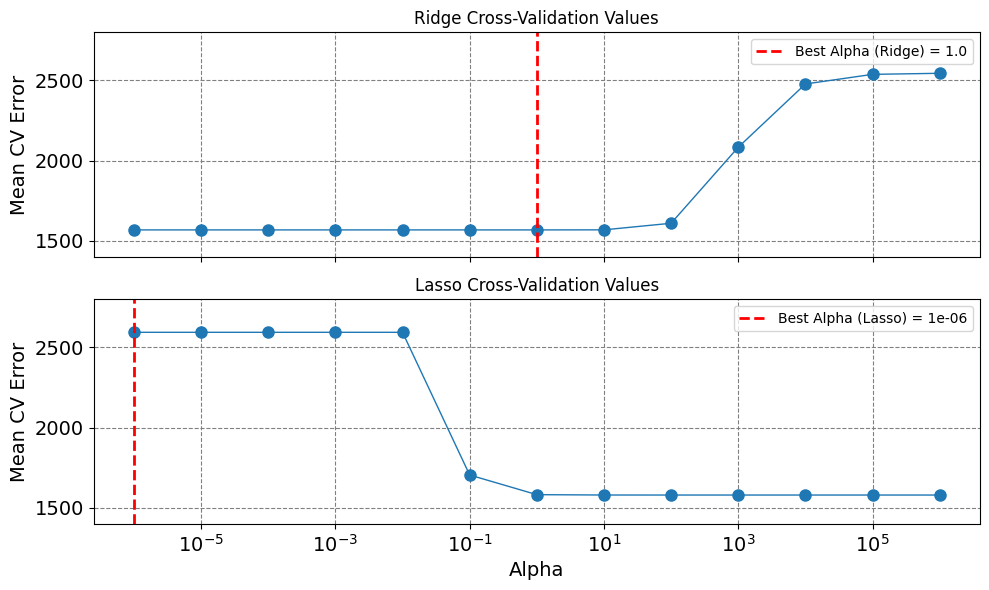

In [7]:
import matplotlib.pyplot as plt

# Plot Ridge cross-validation values
ridge_cv_values = np.mean(ridge_cv.cv_values_, axis=0)

# Plot Lasso cross-validation values
lasso_cv_values = np.mean(lasso_cv.mse_path_, axis=1)

# Create subplots with a shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot Ridge results
ax1.semilogx(alphas, ridge_cv_values.T, '-o')
ax1.set(title = 'Ridge Cross-Validation Values', ylabel = 'Mean CV Error', ylim = [1400, 2800])

# Highlight the best alpha for Ridge
ax1.axvline(best_alpha_ridge, color='red', lw = 2, linestyle='--', label=f'Best Alpha (Ridge) = {best_alpha_ridge}')
ax1.legend()

# Plot Lasso results
ax2.semilogx(alphas, lasso_cv_values, '-o')
ax2.set(title = 'Lasso Cross-Validation Values', xlabel = 'Alpha', ylabel = 'Mean CV Error', ylim = [1400, 2800])

# Highlight the best alpha for Lasso
ax2.axvline(best_alpha_lasso, color='red', lw = 2, linestyle='--', label=f'Best Alpha (Lasso) = {best_alpha_lasso}')
ax2.legend()

plt.tight_layout()
plt.show()

In [8]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_train_pred = linear_reg.predict(X_train)
linear_test_pred = linear_reg.predict(X_test)

# Ridge Regression
ridge_reg = Ridge(alpha=1)  # Alpha parameter controls regularization strength - adjust for tuning
ridge_reg.fit(X_train, y_train)
ridge_train_pred = ridge_reg.predict(X_train)
ridge_test_pred = ridge_reg.predict(X_test)

# Lasso Regression
lasso_reg = Lasso(alpha=1)  # Alpha parameter controls regularization strength - adjust for tuning
lasso_reg.fit(X_train, y_train)
lasso_train_pred = lasso_reg.predict(X_train)
lasso_test_pred = lasso_reg.predict(X_test)

# Print results without coefficients for brevity
print("Linear Regression - Training set:")
print("Mean Squared Error (MSE):", f"{evaluate_performance(y_train, linear_train_pred)[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_train, linear_train_pred)[1]:.3f}")
print("\nLinear Regression - Test set:")
print("Mean Squared Error (MSE):", f"{evaluate_performance(y_test, linear_test_pred)[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_test, linear_test_pred)[1]:.3f}")
print(30*'_')

print("\nRidge Regression - Training set:")
print("Mean Squared Error (MSE):", f"{evaluate_performance(y_train, ridge_train_pred)[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_train, ridge_train_pred)[1]:.3f}")
print("\nRidge Regression - Test set:")
print("Mean Squared Error (MSE):", f"{evaluate_performance(y_test, ridge_test_pred)[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_test, ridge_test_pred)[1]:.3f}")
print(30*'_')

print("\nLasso Regression - Training set:")
print("Mean Squared Error (MSE):", f"{evaluate_performance(y_train, lasso_train_pred)[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_train, lasso_train_pred)[1]:.3f}")
print("\nLasso Regression - Test set:")
print("Mean Squared Error (MSE):", f"{evaluate_performance(y_test, lasso_test_pred)[0]:.3f}")
print("R-squared:", f"{evaluate_performance(y_test, lasso_test_pred)[1]:.3f}")
print(30*'_')

Linear Regression - Training set:
Mean Squared Error (MSE): 1544.588
R-squared: 0.390

Linear Regression - Test set:
Mean Squared Error (MSE): 1716.085
R-squared: 0.463
______________________________

Ridge Regression - Training set:
Mean Squared Error (MSE): 1544.472
R-squared: 0.390

Ridge Regression - Test set:
Mean Squared Error (MSE): 1707.123
R-squared: 0.466
______________________________

Lasso Regression - Training set:
Mean Squared Error (MSE): 1545.550
R-squared: 0.390

Lasso Regression - Test set:
Mean Squared Error (MSE): 1717.399
R-squared: 0.463
______________________________


In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for coefficients
coefficients_data = {
    'Linear Regression': linear_reg.coef_,
    'Ridge Regression': ridge_reg.coef_,
    'Lasso Regression': lasso_reg.coef_
}

coefficients_df = pd.DataFrame(coefficients_data, index=[f'Feature {i}' for i in range(1, 5)])
display(coefficients_df)

# We also could see the intercepts:
# print(linear_reg.intercept_)
# print(ridge_reg.intercept_)
# print(lasso_reg.intercept_)

,Linear Regression,Ridge Regression,Lasso Regression
Feature 1,3.208184e+01,31.997869,31.024482
Feature 2,1.689111e+13,0.058694,0.000000
Feature 3,-4.066315e+14,0.293472,0.000000
Feature 4,2.880381e+14,0.410861,0.601717


2.5421080923135033
2.4445499128622226
2.48680384051492


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Evaluate performance for both training and test sets
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
train_mse = [evaluate_performance(y_train, linear_train_pred)[0],
             evaluate_performance(y_train, ridge_train_pred)[0],
             evaluate_performance(y_train, lasso_train_pred)[0]]

test_mse = [evaluate_performance(y_test, linear_test_pred)[0],
            evaluate_performance(y_test, ridge_test_pred)[0],
            evaluate_performance(y_test, lasso_test_pred)[0]]

# Create a DataFrame
mse_df = pd.DataFrame({
    'Model': models * 2,
    'MSE': train_mse + test_mse,
    'Set': ['Train'] * len(models) + ['Test'] * len(models)
})
display(mse_df.set_index('Model').round(3))

# Bar plot for MSE on both training and test sets
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot for MSE on both training and test sets
sns.barplot(x='Model', y='MSE', hue='Set', data=mse_df, ec = 'k',
            palette={'Train': '#329932', 'Test': '#3232FF'}, ax=ax)
ax.set_title('Mean Squared Error (MSE) on Training and Test Sets', weight = 'bold')
ax.set_ylabel('MSE')

# Move legend outside the right side of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.99))

plt.tight_layout()
plt.show()

# Linear Models: Classification

## Logistic Regression vs Linear Regression: Example

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression

mu, sigma = 10, 2  # mean and standard deviation
np.random.seed(0)
X = np.random.normal(mu, sigma, 100)
y = np.where(X > mu, 1, 0)
X = X.reshape(-1, 1)
X_gen = np.linspace(X.min(), X.max(), 300)

# Create the models
models = [LinearRegression(), LogisticRegression()]

# Titles for the plots
titles = [ "Linear Regression Model", "Logistic Regression Model"]

fig, axes = plt.subplots(2, 1, figsize=(9.5, 7), sharex=True, gridspec_kw={'hspace': 0})

for i, ax in enumerate(axes):
    model = models[i]
    model.fit(X, y)

    if i == 1:
        Px = (1/(1 + np.exp(- (X_gen * model.coef_ + model.intercept_)))).flatten()
        # Or we could utilize scipy.special.expit
        # Px = expit(X_gen * model.coef_ + model.intercept_).ravel()
    else:
        Px = model.coef_ * X_gen + model.intercept_

    ax.scatter(X, y, color='#b496ff', ec='#602ce5', alpha=0.3, label="Sample Data")
    ax.plot(X_gen, Px, color='#C60004', lw=2, label=titles[i])
    ax.set_xlim([4, 16])
    ax.hlines([0, 1], *ax.get_xlim(), linestyles='dashed', color = '#26912d', lw=1.5)
    ax.set(xlabel='' if i == 0 else 'X', ylabel='Probability(X)')
    ax.grid(False)
    ax.legend(loc = 'right')
    ax.set_ylim(-0.1, 1.1)

plt.tight_layout()

## Logistic Regression: Example


<font color='Blue'><b>Example</b></font>: The synthetic dataset is generated using the `make_blobs` function from scikit-learn. This particular dataset consists of the following characteristics:

- **Number of Samples:** 1000
- **Number of Features:** 2
- **Number of Classes:** 2
- **Random Seed (random_state):** 0
- **Cluster Standard Deviation (cluster_std):** 1.0

**Features:**
- The dataset contains 1000 data points, each described by a pair of feature values. These features are represented as 'Feature 1' and 'Feature 2'.

**Outcome (Target Variable):**
- The dataset also includes a target variable called 'Outcome.' This variable assigns each data point to one of two distinct classes, identified as 'Class 0' and 'Class 1'.

The dataset has been designed to simulate a scenario with two well-separated clusters, making it suitable for binary classification tasks. Each data point in this dataset is associated with one of the two classes, and it can be used for practicing and evaluating machine learning algorithms that deal with binary classification problems.

In [ ]:
from sklearn.datasets import make_blobs
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=1.0)

# Create a scatter plot using Seaborn
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

colors = ["#f5645a", "#b781ea"]
markers = ['o', 's']

# Scatter plot of data points
for num in np.unique(y):
    ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                s=40, edgecolors="k", marker=markers[num], label=str(num))

ax.set(xlim=[-2, 6], ylim=[-2, 8])
ax.legend(title = 'Outcome')
ax.set(xlabel='Feature 1', ylabel='Feature 2')
ax.set_title('Synthetic Dataset', weight = 'bold', fontsize = 16)
plt.tight_layout()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')

log_reg = LogisticRegression()
_ = log_reg.fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

colors = ["#f5645a", "#b781ea"]
edge_colors = ['#8A0002', '#3C1F8B']
cmap_light = ListedColormap(['#f7dfdf', '#e3d3f2'])
markers = ['o', 's']

# Plot decision boundaries
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
log_reg = LogisticRegression(max_iter = 200, solver = 'lbfgs')
log_reg.fit(X, y)
DecisionBoundaryDisplay.from_estimator(log_reg, X, cmap=cmap_light, ax=ax,
                                   response_method="predict",
                                   plot_method="pcolormesh",
                                   xlabel= 'Feature 1', ylabel='Feature 2',
                                   shading="auto")
# Scatter plot of data points
for num in np.unique(y):
    ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                s=40, edgecolors="k", marker=markers[num], label=str(num))

ax.set(xlim=[-2, 6], ylim=[-2, 8])
ax.legend(title = 'Outcome')
ax.set(xlim=[-2, 6], ylim=[-2, 8])
ax.set_title(f'Logistic Regression', fontweight='bold', fontsize = 16)
ax.grid(False)
plt.tight_layout()

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

fig, axes = plt.subplots(1, 2, figsize=(9.5, 4.5))

# Create a loop for train and test sets
for i, (X_set, y_set, title) in enumerate([(X_train, y_train, 'Train Set'), (X_test, y_test, 'Test Set')]):
    # Plot decision boundaries
    DecisionBoundaryDisplay.from_estimator(log_reg, X_set, cmap=cmap_light, ax=axes[i],
                                           response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel='Feature 1', ylabel='Feature 2',
                                           shading="auto")
    for num in np.unique(y):
        axes[i].scatter(X_set[:, 0][y_set == num],
                     X_set[:, 1][y_set == num], c=colors[num],
                    s=40, edgecolors="k", marker=markers[num], label= f'Outcome {num}')

    # Plot data points where y_set and log_reg(X_set) differ in color
    axes[i].scatter(X_set[:, 0][y_set != log_reg.predict(X_set)],
                    X_set[:, 1][y_set != log_reg.predict(X_set)],
                    fc='Yellow', ec='black', s=40, marker= 'h', label= 'Misclassified')

    axes[i].set_title(f'{title} - Logistic Regression', fontweight='bold', fontsize=16)
    axes[i].grid(False)
    # Remove the legend for each panel
    axes[i].legend()
    axes[i].get_legend().remove()

# Create a single legend for both subplots at the top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, borderaxespad= -0.2)
plt.tight_layout()

## Classification Accuracy Metrics

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix  # Import necessary functions/classes

def format_confusion_matrix(cm, title):
    true_neg, false_pos, false_neg, true_pos = cm.ravel()
    result = f"\033[1m{title} Set Confusion Matrix\033[0m:\n"
    result += f"- {true_neg} instances were correctly predicted as class 0.\n"
    result += f"- {true_pos} instances were correctly predicted as class 1.\n"
    result += f"- {false_pos} instance was incorrectly predicted as class 1 when it was actually class 0.\n"
    result += f"- {false_neg} instances were incorrectly predicted as class 0 when they were actually class 1.\n"

    return result


def plot_cm(model, X_train, X_test, y_train, y_test, class_names, figsize=(7, 4)):
    # Create a figure and axes for displaying confusion matrices side by side
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    datasets = [(X_train, y_train, 'Train'), (X_test, y_test, 'Test')]

    for i in range(2):
        X, y, dataset_name = datasets[i]

        # Compute confusion matrix for the dataset predictions
        cm = confusion_matrix(y, model.predict(X))

        result = format_confusion_matrix(cm, dataset_name)
        print(result)

        # Create a ConfusionMatrixDisplay and plot it on the respective axis
        cm_display = ConfusionMatrixDisplay(cm, display_labels=class_names)\
                        .plot(ax=ax[i],
                              im_kw=dict(cmap='Greens' if dataset_name == 'Train' else 'Blues'),
                              text_kw={"size": 16}, colorbar=False)
        ax[i].set_title(f'{dataset_name} Data')
        ax[i].grid(False)

    # Add a super title for the entire figure
    fig.suptitle('Confusion Matrices', fontsize=16, weight = 'bold')

    # Adjust the layout for better spacing
    plt.tight_layout()

In [ ]:
plot_cm(log_reg, X_train, X_test, y_train, y_test, ['0', '1'], figsize=(6, 3))

In [ ]:
def _gen_cr(model, X, y):
    y_pred = model.predict(X)
    Results = pd.DataFrame(classification_report(y, y_pred,
                                             output_dict=True)).T
    display(Results.style.format(precision = 3))

print('\nTrain Data:')
_gen_cr(log_reg, X_train, y_train)

print('\nTest Data:')
_gen_cr(log_reg, X_test, y_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming you have X and y defined earlier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')

log_reg = LogisticRegression()
_ = log_reg.fit(X_train, y_train)

# Predict probabilities on train and test sets
y_train_probs = log_reg.predict_proba(X_train)[:, 1]
y_test_probs = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves using fig and ax
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve for train set
axs[0].plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.3f})', color='green', lw = 3)
axs[0].set_title('Receiver Operating Characteristic (ROC) - Train Set')

# Plot ROC curve for test set
axs[1].plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.3f})', color='blue', lw = 3)
axs[1].set_title('Receiver Operating Characteristic (ROC) - Test Set')

for ax in axs:
  ax.plot([0, 1], [0, 1], color='red', linestyle='--', lw = 2)
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.legend()

# Adjust layout and display the plots
plt.tight_layout()